In [1]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv("./dataset/heart_failure_clinical_records_dataset.csv")
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [87]:
# Splitting predictors and target
x = dataset.drop(columns=["DEATH_EVENT"])
y = dataset["DEATH_EVENT"]

In [88]:
# Scaling input
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)

x = scaler.fit_transform(x)

# Splitting into train/test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("x_train Shape : ", x_train.shape)
print("x_test Shape  : ", x_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

x_train Shape :  (239, 12)
x_test Shape  :  (60, 12)
y_train Shape :  (239,)
y_test Shape  :  (60,)


## Model building

In [89]:
# Model building
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

nn_model = MLPClassifier(random_state=0)
nn_model.fit(x_train, y_train)

y_pred = nn_model.predict(x_test)

print("Accuracy score  : {:.4f}".format(accuracy_score(y_pred, y_test)))
print("Precision score : {:.4f}".format(precision_score(y_pred, y_test)))
print("Recall score    : {:.4f}".format(recall_score(y_pred, y_test)))
print("F1 score        : {:.4f}".format(f1_score(y_pred, y_test)))
print("AUC ROC score   : {:.4f}".format(roc_auc_score(y_pred, y_test)))
print("\n", classification_report(y_pred, y_test))

Accuracy score  : 0.7833
Precision score : 0.4348
Recall score    : 1.0000
F1 score        : 0.6061
AUC ROC score   : 0.8700

               precision    recall  f1-score   support

           0       1.00      0.74      0.85        50
           1       0.43      1.00      0.61        10

    accuracy                           0.78        60
   macro avg       0.72      0.87      0.73        60
weighted avg       0.91      0.78      0.81        60



/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Parameters tuning with Grid search (using AUC ROC as scoring method)

In [90]:
from sklearn.model_selection import GridSearchCV

activation_fn = ["identity", "relu", "logistic", "tanh"] # activation function
solver = ["lbfgs", "adam", "sgd"] # optimizer
alpha = [0.0001, 0.05] # Ridge regression's alpha
learning_rate = list(['constant','adaptive'])
hidden_layer_sizes = list([(50,50,50), (50,100,50), (100,)]) # different sizes of hidden layers


param_grid = dict(
    activation = activation_fn,
    solver = solver,
    alpha = alpha,
    learning_rate = learning_rate,
    hidden_layer_sizes = hidden_layer_sizes
)

mlp = MLPClassifier(max_iter=100)
clf = GridSearchCV(mlp, param_grid=param_grid, 
                   cv=10, 
                   scoring='roc_auc',
                   n_jobs=-1, verbose=2
                  )
clf.fit(x_train, y_train)
clf.best_params_

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 485 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1133 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  2.6min finished


{'activation': 'identity',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 50, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

## Using the tuned parameters

In [91]:
mlpc_final = MLPClassifier(activation = 'tanh',
                           alpha = 0.05,
                           hidden_layer_sizes = (50, 50, 50),
                           learning_rate = 'adaptive',
                           solver = 'adam',
                           random_state = 0
                          )
mlpc_final.fit(x_train, y_train)
y_pred = mlpc_final.predict(x_test)

print("Accuracy score  : {:.4f}".format(accuracy_score(y_pred, y_test)))
print("Precision score : {:.4f}".format(precision_score(y_pred, y_test)))
print("Recall score    : {:.4f}".format(recall_score(y_pred, y_test)))
print("F1 score        : {:.4f}".format(f1_score(y_pred, y_test)))
print("AUC ROC score   : {:.4f}".format(roc_auc_score(y_pred, y_test)))
print("\n", classification_report(y_pred, y_test))

Accuracy score  : 0.7667
Precision score : 0.5217
Recall score    : 0.8000
F1 score        : 0.6316
AUC ROC score   : 0.7778

               precision    recall  f1-score   support

           0       0.92      0.76      0.83        45
           1       0.52      0.80      0.63        15

    accuracy                           0.77        60
   macro avg       0.72      0.78      0.73        60
weighted avg       0.82      0.77      0.78        60



## Visuallizing confusion matrix

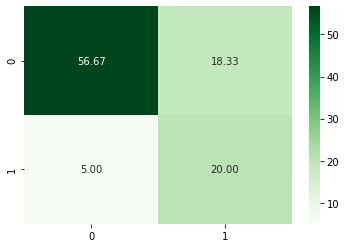

In [92]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test)

sns.heatmap((cm/np.sum(cm) * 100),
            annot = True,
            fmt = ".2f",
            cmap = "Greens"
           )

## Using boostrap sampling

In [93]:
from sklearn.utils import resample

all_accuracy_scores = []

for i in range(0, 101): # repeat bootstrap sampling 100 times
    x_boot = resample(dataset, replace=True)
    oob = dataset[~dataset.apply(tuple,1).isin(x_boot.apply(tuple,1))]
    
    mlpc_boot = MLPClassifier(activation = 'tanh',
                              alpha = 0.05,
                              hidden_layer_sizes = (50, 50, 50),
                              learning_rate = 'adaptive',
                              solver = 'adam',
                              random_state = 0
                             )
    mlpc_boot.fit(x_boot.drop(columns=["DEATH_EVENT"]), x_boot["DEATH_EVENT"])
    boot_pred = mlpc_boot.predict(oob.drop(columns=["DEATH_EVENT"]))
    
    all_accuracy_scores.append(accuracy_score(boot_pred, oob["DEATH_EVENT"]))

print("Mean accuracy score  : {:.4f}".format(np.mean(all_accuracy_scores)))

Mean accuracy score  : 0.6825


## Using SMOTE method (over sampling)

In [94]:
from imblearn.over_sampling import SMOTE

sms = SMOTE(random_state=0)

x_res, y_res = sms.fit_sample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

print("x_train Shape : ", x_train.shape)
print("x_test Shape  : ", x_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

x_train Shape :  (324, 12)
x_test Shape  :  (82, 12)
y_train Shape :  (324,)
y_test Shape  :  (82,)


In [99]:
mlpc_model = MLPClassifier(activation="relu",
                            alpha=0.05,
                            hidden_layer_sizes= (100,),
                            learning_rate= 'adaptive',
                            solver= 'adam',
                            random_state=42)
mlpc_model.fit(x_train, y_train)
y_pred = mlpc_model.predict(x_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8293
SVC f1-score  : 0.8333
SVC precision : 0.8537
SVC recall    : 0.8140

               precision    recall  f1-score   support

           0       0.80      0.85      0.83        39
           1       0.85      0.81      0.83        43

    accuracy                           0.83        82
   macro avg       0.83      0.83      0.83        82
weighted avg       0.83      0.83      0.83        82



/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


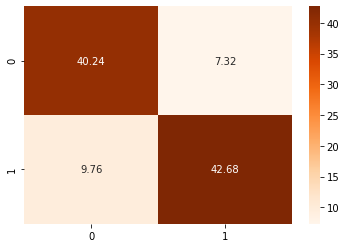

In [100]:
cm = confusion_matrix(y_pred, y_test)

sns.heatmap((cm/np.sum(cm) * 100),
            annot = True,
            fmt = ".2f",
            cmap = "Oranges"
           )